## Chest X-Ray Classification Using AI

This project will use a deep learning model to detect and classify chest disease from X-ray images.

The dataset contains 133 images that belong to 4 classes.
- Healthy.
- Covid-19
- Baterial Pneumonia
- Viral Pneumonia


In [2]:
import os
# import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
!pip install pillow

In [2]:
# Specify training data directory
XRay_Directory = 'Chest_X_Ray/train'

In [3]:
# List the folders in the directory
os.listdir(XRay_Directory)

['0', '1', '2', '3']

In [4]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation  
image_generator = ImageDataGenerator(rescale = 1/255, validation_split=0.2)

In [5]:

# Perform shuffling and image resizing

train_generator = image_generator.flow_from_directory(batch_size=40, directory = XRay_Directory, shuffle=True, target_size=(256,256),class_mode='categorical',subset='training')


Found 228 images belonging to 4 classes.


In [6]:
validation_generator = image_generator.flow_from_directory(batch_size = 40,
                                                           directory = XRay_Directory, 
                                                           shuffle = True, 
                                                           target_size = (256,256), 
                                                           class_mode = 'categorical', 
                                                           subset = "validation")


Found 55 images belonging to 4 classes.


In [10]:
train_generator

In [7]:
# Generate a batch of 40 images and labels

train_images, train_labels = next(train_generator)


In [47]:
train_images

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.12941177, 0.12941177, 0.12941177],
         [0.12156864, 0.12156864, 0.12156864],
         [0.1137255 , 0.1137255 , 0.1137255 ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.12156864, 0.12156864, 0.12156864],
         [0.11764707, 0.11764707, 0.11764707],
         [0.12156864, 0.12156864, 0.12156864]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.12156864, 0.12156864, 0.12156864],
         [0.12156864, 0.12156864, 0.12156864],
         [0.12941177, 0.12941177, 0.12941177]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [8]:
train_labels

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]],

In [9]:
# labels Translator 
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Check out the dimensions of the training dataset**

In [15]:
train_images.shape

(40, 256, 256, 3)

In [16]:

train_labels.shape

(40, 4)

Data visualization will be performed on the dataset to display the images being worked on

In [49]:
train_images[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.30588236, 0.30588236, 0.30588236],
        [0.43529415, 0.43529415, 0.43529415],
        [0.41960788, 0

In [54]:
[np.argmax(train_labels[13])]

[2]

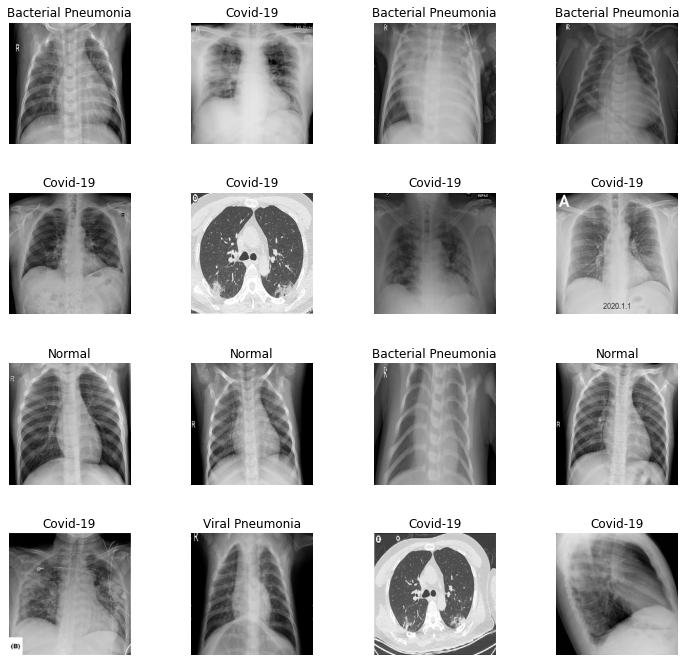

In [50]:
# Create a grid of 16 images along with their corresponding labels
L = 4
W = 4

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')    

plt.subplots_adjust(wspace = 0.5)    

A grid of 36 images will be visualized along with their corresponding labels

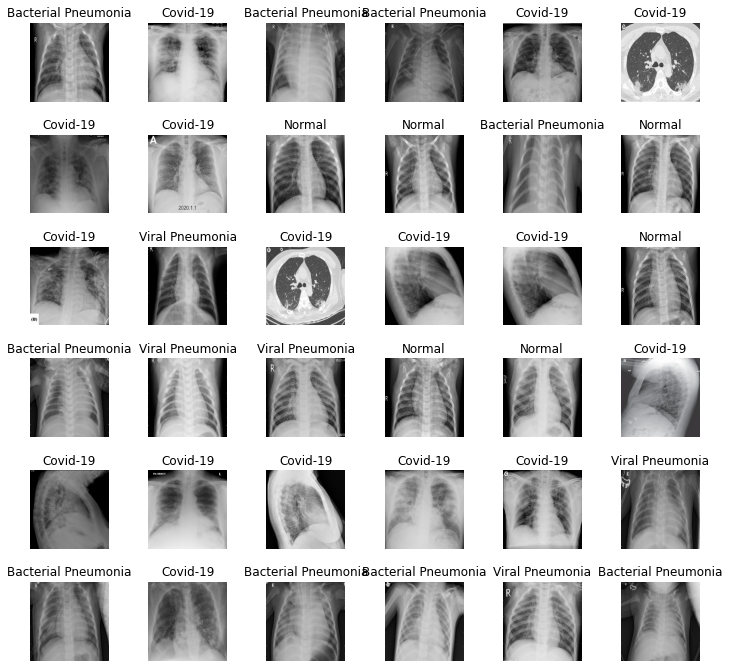

In [18]:
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')    

plt.subplots_adjust(wspace = 0.5)    



The first CNN layers are used to extract high level general features while the last couple of layers are used to perform classification on a specific task. 
Below is the diagram of the deep learning model.

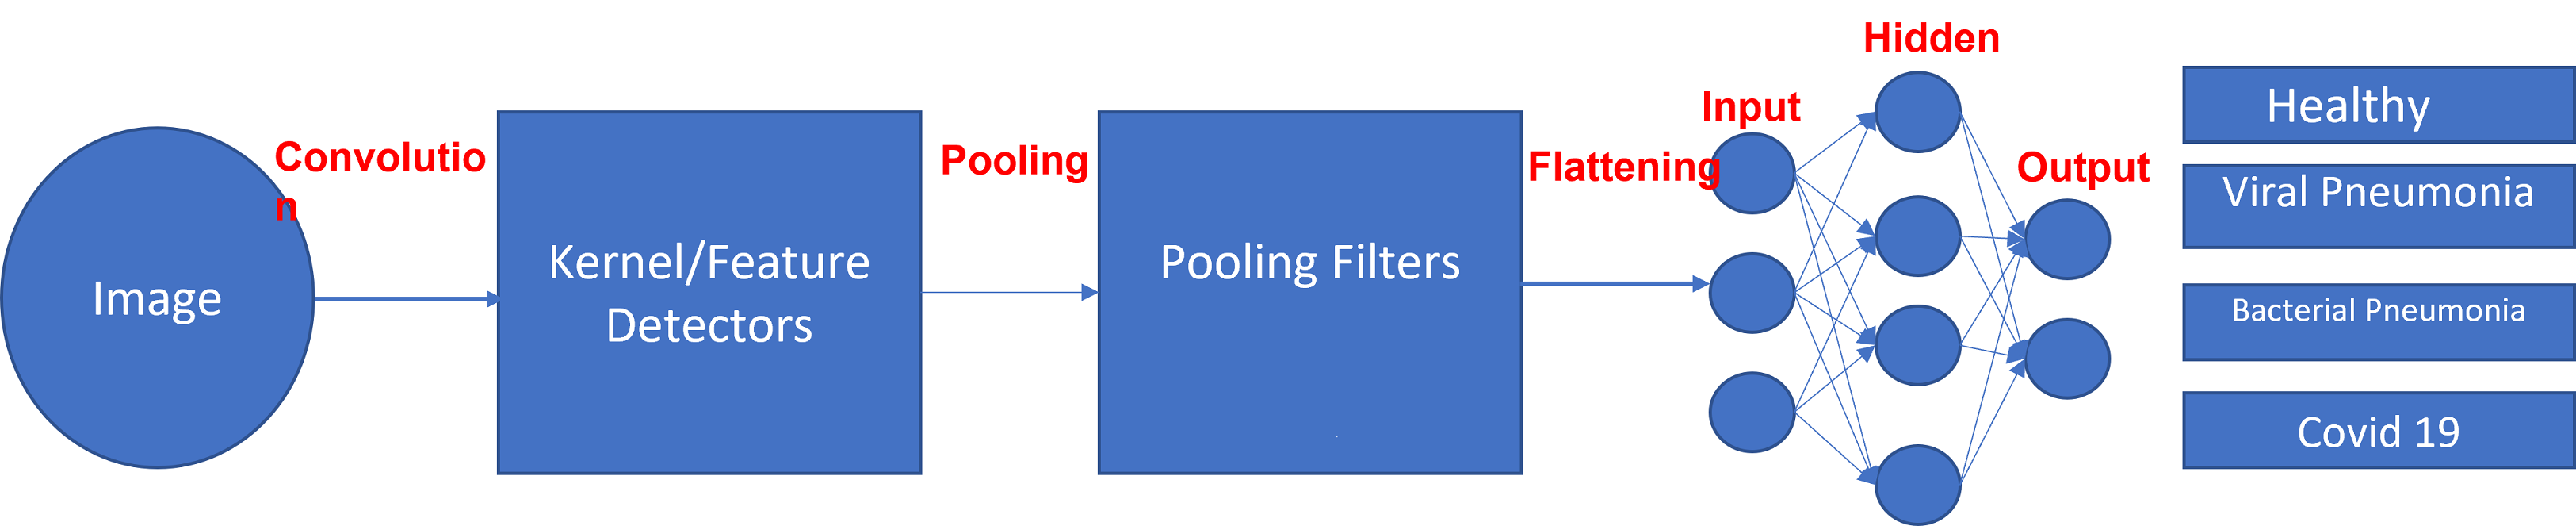

Transfer Learning would be applied to reduce computational time  

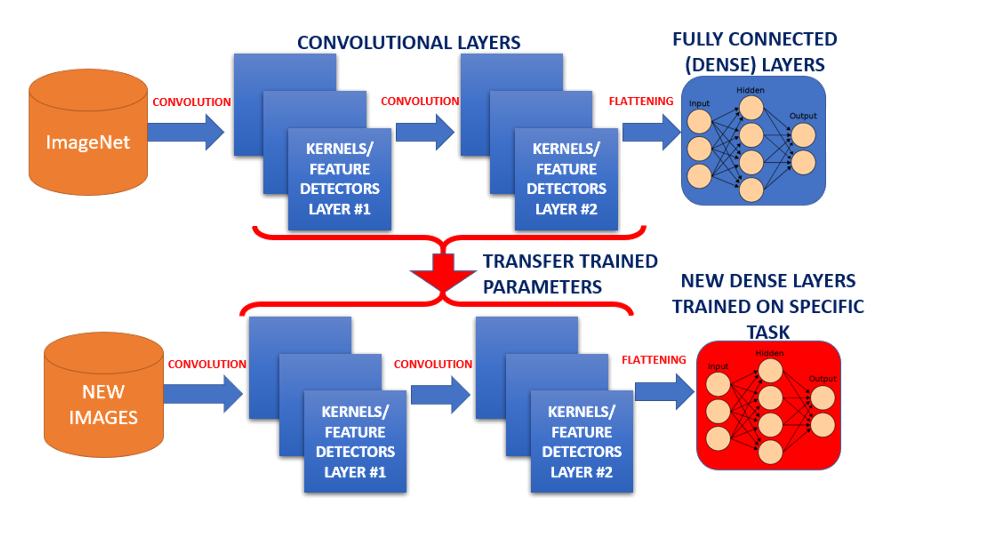

In [20]:
#IMPORT MODEL WITH PRETRAINED WEIGHTS
basemodel = ResNet50(weights = 'imagenet',include_top = False, input_tensor=Input(shape=(256,256,3)) )

94765736/94765736 [==============================] - 75s 1us/step


In [22]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

 
The first trained layers (base model) would be copied and new custom layers would be added to the output to perform classification on a specific new task.

In [23]:
#freezing the model upto the last stage - 4 and re-training stage -5 

for layer in basemodel.layers[:-10]:
  layers.trainable = False

In [28]:
# TRAIN RESNET MODEL WITH THE NEW DATASETS
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation='relu')(headmodel) 
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation ='softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4, decay = 1e-6), metrics= ["accuracy"])

In [31]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [32]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="training")
val_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="validation")

Found 228 images belonging to 4 classes.
Found 55 images belonging to 4 classes.


In [34]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 20, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])

Epoch 1/20
57/57 [==============================] - ETA: 0s - loss: 0.4395 - accuracy: 0.8684
Epoch 1: val_loss did not improve from 4.07557
57/57 [==============================] - 73s 1s/step - loss: 0.4395 - accuracy: 0.8684 - val_loss: 4.7738 - val_accuracy: 0.4423
Epoch 2/20
57/57 [==============================] - ETA: 0s - loss: 0.2279 - accuracy: 0.9123
Epoch 2: val_loss did not improve from 4.07557
57/57 [==============================] - 72s 1s/step - loss: 0.2279 - accuracy: 0.9123 - val_loss: 5.8275 - val_accuracy: 0.4423
Epoch 3/20
57/57 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9518
Epoch 3: val_loss did not improve from 4.07557
57/57 [==============================] - 72s 1s/step - loss: 0.1279 - accuracy: 0.9518 - val_loss: 7.3829 - val_accuracy: 0.4423
Epoch 4/20
57/57 [==============================] - ETA: 0s - loss: 0.1703 - accuracy: 0.9474
Epoch 4: val_loss did not improve from 4.07557
57/57 [==============================] - 72s 1s/s

In [56]:
train_generator.n

228

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [36]:
model

# Evaluating the deep learning model

In [37]:
# Let's compile the model 
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [38]:
test_directory = 'Chest_X_Ray/Test'


In [39]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_directory(batch_size = 40, directory= test_directory, shuffle= True, target_size=(256,256), class_mode= 'categorical')

evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.


C:\Users\moyin\AppData\Local\Temp\ipykernel_8928\3632543790.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose =1)


10/10 [==============================] - 6s 157ms/step - loss: 2.4291 - accuracy: 0.8000
Accuracy Test : 0.800000011920929


In [40]:
!pip install opencv-python

In [61]:
os.path.join(test_directory,str(10))


'Chest_X_Ray/Test\\10'

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory,str(i))):
    img= cv2.imread(os.path.join(test_directory,str(i),item))
    img = cv2.resize(img,(256,256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

1/1 [==============================] - 0s 124ms/step


In [42]:
len(original)

40

In [43]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.775


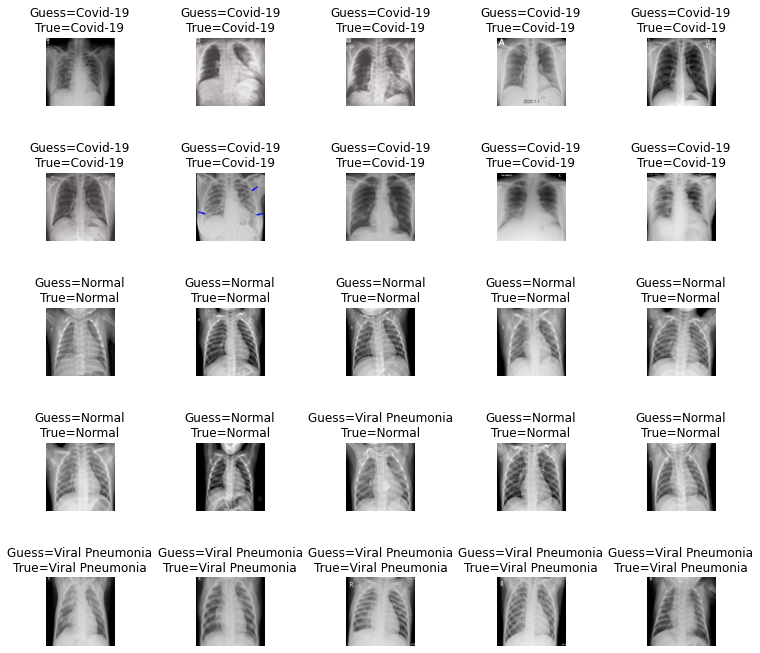

In [44]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2) 

In [45]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.82      0.90      0.86        10
           2       0.67      0.60      0.63        10
           3       0.86      0.60      0.71        10

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40



Text(0.5, 1.0, 'Confusion_matrix')

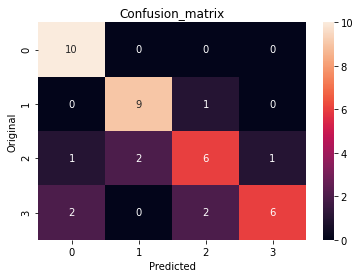

In [46]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

# Conclusion
I achieved an accuracy of 78% with the trained deep-learning model. However, it could be increased and optimized if the model is trained with more epochs (for a longer time)